## View Data


[496.874999, 382.99623199999996, 458.125, 367.10426999999993, 398.125, 308.304019, 373.125001, 325.785175, 64.375, 85.816584, 11.250000999999997, 62.77324200000001, 10.0, 77.076004, 43.125001, 108.065325, 139.375001, 170.04397, 363.125001, 346.44472300000007, 361.250001, 375.84485, 375.625, 392.531406, 423.125001, 414.78015, 458.125, 454.510051, 601.250001, 558.602388, 631.250001, 515.694096, 631.250001, 491.85615400000006, 619.375001, 473.58040099999994, 496.874999, 382.99623199999996]


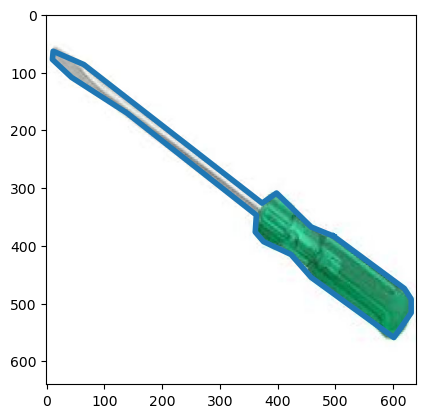

In [3]:
from matplotlib import pyplot as plt
from PIL import Image
from glob import glob
import numpy as np


img_path = "img.jpg"
label_path = "label.txt"


img = Image.open(img_path)

# Get Contour
contour = open(label_path).readline().split()[1:]
contour = [float(d) * img.size[0] for d in contour]
contour_x = contour[::2]  # [0, 2, 4, 6, 8]
contour_y = contour[1::2]  # [1, 3, 5, 7, 9]


plt.imshow(img)
plt.plot(contour_x, contour_y, linewidth = 4)
print(contour)

# Rotated Bounding Box 제작


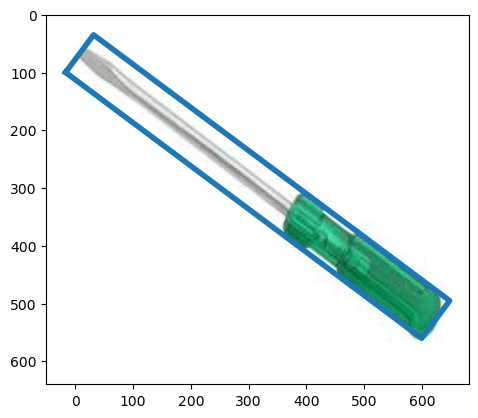

In [4]:
import cv2

# contour의 x와 y값을 이용해 Rotated Bounding Box를 제작
points = np.array([contour_x, contour_y], dtype=int).T
rect = cv2.minAreaRect(points)  # rotated box 정보(cx, cy, w, h, θ)
box = cv2.boxPoints(rect).astype("float32")  # 사각형 정보로 변환 (x1,y1)…(x4,y4)
box = np.vstack([box, box[0]])


plt.imshow(img)
plt.plot(box[:, 0], box[:, 1], linewidth=4)